In [2]:
import pandas as pd
import re

In [2]:
import mysql.connector
import pandas as pd

# Connect to the MySQL database
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='hannibal1999',
    database='crawler_lotech'
)
query = """
select title , manufacturer.name , screen_size.size, cpu.name , ram.name ,  gpu.type
from product
join manufacturer on product.manufacturer_id = manufacturer.id
join screen_size on product.screen_size_id = screen_size.id
join resolution on product.resolution_id = resolution.id
join cpu on product.cpu_id = cpu.id
join ram on product.ram_id = ram.id
join ram_type on product.ram_type_id = ram_type.id
join gpu on product.gpu_id = gpu.id
join gpu_ram on product.gpu_ram_id = gpu_ram.id

;"""
cursor = cnx.cursor()

In [3]:

cursor.execute(query)
rows = cursor.fetchall()
crawl_df = pd.DataFrame(rows , columns=['model_name' , 'manufacturer' , 'screen_size' , 'cpu' , 'ram' , 'gpu'])
#crawl_df.drop(columns=['model_name'] , inplace=True)

In [4]:
crawl_df['cpu'] = crawl_df['cpu'].str.split().str[0]
crawl_df['cpu'] = crawl_df['cpu'].replace("اینتل", "intel")
crawl_df['ram'] = crawl_df['ram'].str.extract('(\d+)')
crawl_df['gpu'] = crawl_df['gpu'].str.split().str[0]
crawl_df['gpu'] = crawl_df['gpu'].replace("انویدیا", "Nvidia")
crawl_df['model_name'] = crawl_df['model_name'].astype(str)
crawl_df['model_name'] = crawl_df['model_name'].str.extract(r'لپ تاپ\s(.*?)(?=\s[^\x00-\x7F]+|$)')

In [5]:
'''from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming you have your data stored in the 'crawl_df' DataFrame

# Select the relevant columns for clustering
X = crawl_df[[ 'model_name' , 'manufacturer', 'screen_size', 'cpu', 'ram', 'gpu']]

# Convert string columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in X.columns:
    X[column] = label_encoder.fit_transform(X[column])

# Define a range of cluster numbers to evaluate
cluster_range = range(1, 10)
inertia = []

# Perform K-means clustering for each cluster number
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Assuming you have determined the optimal number of clusters and stored it in 'num_clusters'

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Assign cluster labels to each data point
labels = kmeans.labels_

# Add the cluster labels to the 'crawl_df' DataFrame
crawl_df['cluster'] = labels

# Group the DataFrame by cluster and check the common columns
cluster_columns = crawl_df.groupby('cluster').agg(lambda x: x.mode().iloc[0])

# Print the common columns for each cluster
for cluster_num, row in cluster_columns.iterrows():
    common_columns = row[row.notnull()].index.tolist()
    print(f"Cluster {cluster_num}: {common_columns}")'''

'from sklearn.cluster import KMeans\nfrom sklearn.preprocessing import LabelEncoder\nimport matplotlib.pyplot as plt\n\n# Assuming you have your data stored in the \'crawl_df\' DataFrame\n\n# Select the relevant columns for clustering\nX = crawl_df[[ \'model_name\' , \'manufacturer\', \'screen_size\', \'cpu\', \'ram\', \'gpu\']]\n\n# Convert string columns to numeric using LabelEncoder\nlabel_encoder = LabelEncoder()\nfor column in X.columns:\n    X[column] = label_encoder.fit_transform(X[column])\n\n# Define a range of cluster numbers to evaluate\ncluster_range = range(1, 10)\ninertia = []\n\n# Perform K-means clustering for each cluster number\nfor num_clusters in cluster_range:\n    kmeans = KMeans(n_clusters=num_clusters, random_state=42)\n    kmeans.fit(X)\n    inertia.append(kmeans.inertia_)\n\n# Plot the elbow curve\nplt.plot(cluster_range, inertia, marker=\'o\')\nplt.xlabel(\'Number of Clusters\')\nplt.ylabel(\'Inertia\')\nplt.title(\'Elbow Curve\')\nplt.show()\n\n# Assuming yo

In [6]:
crawl_df

,model_name,manufacturer,screen_size,cpu,ram,gpu
0,پاویلیون 15-EG0361,HP,15.6,intel,8,Nvidia
1,Victus 16-D0019,HP,16.1,intel,16,Nvidia
2,Victus 16T-D000,HP,16.1,intel,16,Nvidia
3,Victus 15 FA1093DX,HP,15.6,intel,16,Nvidia
4,OMEN 16-C0002dx,HP,16.1,AMD,32,AMD
...,...,...,...,...,...,...
276,TUF Gaming F15 FX507ZU,ASUS,15.6,intel,16,Nvidia
277,TUF Gaming F15 FX507ZV4,ASUS,15.6,intel,16,Nvidia
278,ROG Strix Scar 17 G733PY,ASUS,17.3,AMD,32,Nvidia
279,ROG Strix Scar 17 G733PY,ASUS,17.3,AMD,32,Nvidia


In [7]:
'''crawl_df.drop(columns=['model_name'] , inplace=True)'''
crawl_df = crawl_df.drop_duplicates().reset_index(drop=True)

crawl_df


,model_name,manufacturer,screen_size,cpu,ram,gpu
0,پاویلیون 15-EG0361,HP,15.6,intel,8,Nvidia
1,Victus 16-D0019,HP,16.1,intel,16,Nvidia
2,Victus 16T-D000,HP,16.1,intel,16,Nvidia
3,Victus 15 FA1093DX,HP,15.6,intel,16,Nvidia
4,OMEN 16-C0002dx,HP,16.1,AMD,32,AMD
...,...,...,...,...,...,...
171,TUF Gaming F15 FX507ZE,ASUS,15.6,intel,16,Nvidia
172,ROG Zephyrus G15 GA503RW,ASUS,15.6,AMD,16,Nvidia
173,TUF Gaming F15 FX507ZV4,ASUS,15.6,intel,16,Nvidia
174,TUF Gaming F15 FX507ZU,ASUS,15.6,intel,16,Nvidia


In [8]:
'''import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming you have your data stored in the 'crawl_df' DataFrame

# Select the relevant columns for clustering
columns_to_encode = ['manufacturer', 'screen_size', 'cpu', 'ram', 'gpu']
numeric_columns = ['screen_size', 'ram']

# One-hot encode the categorical columns
one_hot_df = pd.get_dummies(crawl_df[columns_to_encode])

# Scale the numeric columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(crawl_df[numeric_columns])
scaled_df = pd.DataFrame(scaled_df, columns=numeric_columns)

# Concatenate the encoded categorical columns and scaled numeric columns
X = pd.concat([one_hot_df, scaled_df], axis=1)

# Define a range of cluster numbers to evaluate
cluster_range = range(1, 10)
inertia = []

# Perform K-means clustering for each cluster number
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Assuming you have determined the optimal number of clusters and stored it in 'num_clusters'

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to each data point
labels = kmeans.labels_

# Add the cluster labels to the 'crawl_df' DataFrame
crawl_df['cluster'] = labels

# Group the DataFrame by cluster and check the common columns
cluster_columns = crawl_df.groupby('cluster').agg(lambda x: x.mode().iloc[0])

# Print the common columns for each cluster
for cluster_num, row in cluster_columns.iterrows():
    common_columns = row[row.notnull()].index.tolist()
    print(f"Cluster {cluster_num}: {common_columns}")
'''

'import matplotlib.pyplot as plt\nfrom sklearn.decomposition import TruncatedSVD\nfrom sklearn.preprocessing import MinMaxScaler\nimport pandas as pd\n\n# Assuming you have your data stored in the \'crawl_df\' DataFrame\n\n# Select the relevant columns for clustering\ncolumns_to_encode = [\'manufacturer\', \'screen_size\', \'cpu\', \'ram\', \'gpu\']\nnumeric_columns = [\'screen_size\', \'ram\']\n\n# One-hot encode the categorical columns\none_hot_df = pd.get_dummies(crawl_df[columns_to_encode])\n\n# Scale the numeric columns\nscaler = MinMaxScaler()\nscaled_df = scaler.fit_transform(crawl_df[numeric_columns])\nscaled_df = pd.DataFrame(scaled_df, columns=numeric_columns)\n\n# Concatenate the encoded categorical columns and scaled numeric columns\nX = pd.concat([one_hot_df, scaled_df], axis=1)\n\n# Define a range of cluster numbers to evaluate\ncluster_range = range(1, 10)\ninertia = []\n\n# Perform K-means clustering for each cluster number\nfor num_clusters in cluster_range:\n    kmean

In [9]:
crawl_df

,model_name,manufacturer,screen_size,cpu,ram,gpu
0,پاویلیون 15-EG0361,HP,15.6,intel,8,Nvidia
1,Victus 16-D0019,HP,16.1,intel,16,Nvidia
2,Victus 16T-D000,HP,16.1,intel,16,Nvidia
3,Victus 15 FA1093DX,HP,15.6,intel,16,Nvidia
4,OMEN 16-C0002dx,HP,16.1,AMD,32,AMD
...,...,...,...,...,...,...
171,TUF Gaming F15 FX507ZE,ASUS,15.6,intel,16,Nvidia
172,ROG Zephyrus G15 GA503RW,ASUS,15.6,AMD,16,Nvidia
173,TUF Gaming F15 FX507ZV4,ASUS,15.6,intel,16,Nvidia
174,TUF Gaming F15 FX507ZU,ASUS,15.6,intel,16,Nvidia


In [10]:
# Connect to the MySQL database
cnx = mysql.connector.connect(
    host='localhost',
    user='root',
    password='hannibal1999',
    database='lotech'
)
lotech_query = """
select model_name  , manufacturers.Name , screen.size , cpu.brand , ram.capacity, gpu.brand, sum(total_price) as sale
from products
join order_details on products.code = order_details.product_code
join manufacturers on products.manufacturer_id = manufacturers.id
join screen on products.screen_id = screen.id
join gpu on products.GPU_id = gpu.id
join cpu on products.CPU_id = cpu.id
join ram on products.RAM_id = ram.id
group by model_name  , manufacturers.Name , screen.size , cpu.brand , ram.capacity, gpu.brand;
;"""
cursor = cnx.cursor()

In [11]:

cursor.execute(lotech_query)
rows = cursor.fetchall()
lotech_df = pd.DataFrame(rows , columns=['model_name' , 'manufacturer' , 'screen_size' , 'cpu' , 'ram' , 'gpu', 'sale'])

lotech_df = lotech_df.drop_duplicates().reset_index(drop=True)
#lotech_df.drop(columns=['model_name'] , inplace=True)
lotech_df

,model_name,manufacturer,screen_size,cpu,ram,gpu,sale
0,110-15ACL (A6-7310/4GB/500GB/W10),Lenovo,15.6,AMD,4,AMD,530322000
1,14-am079na (N3710/8GB/2TB/W10),HP,14.0,Intel,8,Intel,1622803500
2,15-AC110nv (i7-6500U/6GB/1TB/Radeon,HP,15.6,Intel,6,AMD,36165102000
3,15-AY023na (N3710/8GB/2TB/W10),HP,15.6,Intel,8,Intel,1430312000
4,15-ay047nv (i3-6006U/6GB/1TB/Radeon,HP,15.6,Intel,6,AMD,3384948000
...,...,...,...,...,...,...,...
593,Zenbook UX430UA,Asus,14.0,Intel,8,Intel,43551834500
594,ZenBook UX430UN,Asus,14.0,Intel,16,Nvidia,17014844500
595,Zenbook UX510UW-FI095T,Asus,15.6,Intel,8,Nvidia,21120752500
596,ZenBook UX510UX-CN211T,Asus,15.6,Intel,8,Intel,19016790000


C:\Users\Parinaz\AppData\Local\Temp\ipykernel_3932\138469008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\Parinaz\AppData\Local\Temp\ipykernel_3932\138469008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\Parinaz\AppData\Local\Temp\ipykernel_3932\138469008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

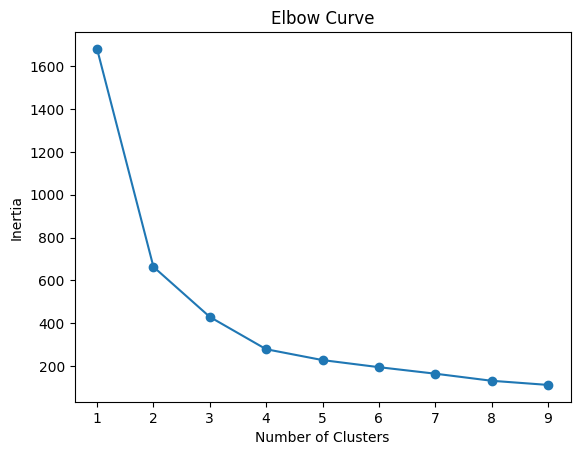

Cluster 0: ['model_name', 'manufacturer', 'screen_size', 'cpu', 'ram', 'gpu']
Cluster 1: ['model_name', 'manufacturer', 'screen_size', 'cpu', 'ram', 'gpu']


c:\Users\Parinaz\Documents\data_analysis\myvenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


X = crawl_df[[ 'manufacturer', 'screen_size', 'cpu', 'ram', 'gpu']]
label_encoder = LabelEncoder()
for column in X.columns:
    X[column] = label_encoder.fit_transform(X[column])
cluster_range = range(1, 10)
inertia = []
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
crawl_df['cluster'] = labels
cluster_columns = crawl_df.groupby('cluster').agg(lambda x: x.mode().iloc[0])
for cluster_num, row in cluster_columns.iterrows():
    common_columns = row[row.notnull()].index.tolist()
    print(f"Cluster {cluster_num}: {common_columns}")
    

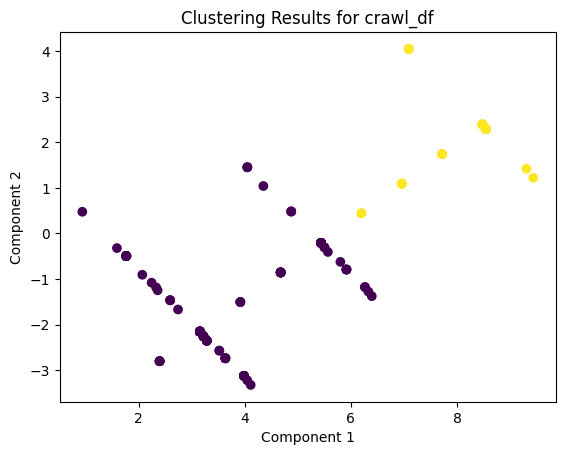

In [15]:
'''import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Assuming you have determined the optimal number of clusters and stored it in 'num_clusters'

columns_to_encode = ['manufacturer', 'screen_size', 'cpu', 'ram', 'gpu']
crawl_df[columns_to_encode] = crawl_df[columns_to_encode].astype(str)
label_encoder = LabelEncoder()
for column in columns_to_encode:
    crawl_df[column] = label_encoder.fit_transform(crawl_df[column])

svd = TruncatedSVD(n_components=2, random_state=42)
X_crawl_svd = svd.fit_transform(crawl_df[columns_to_encode])
crawl_labels = crawl_df['cluster']
# Get unique clusters and assign unique colors to them
unique_clusters = np.unique(crawl_labels)
num_clusters = len(unique_clusters)
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))

plt.scatter(X_crawl_svd[:, 0], X_crawl_svd[:, 1], c=crawl_labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering Results for crawl_df')
plt.show()
'''

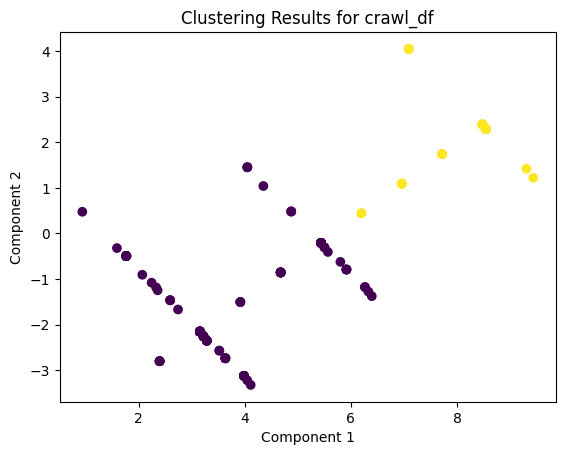

Cluster 0:
- Average manufacturer value: 0.35766423357664234
- Average screen size value: 2.372262773722628

Cluster 1:
- Average manufacturer value: 0.3076923076923077
- Average screen size value: 2.1025641025641026



In [16]:
crawl_labels = kmeans.labels_  
unique_clusters = np.unique(crawl_labels)
num_clusters = len(unique_clusters)
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))

plt.scatter(X_crawl_svd[:, 0], X_crawl_svd[:, 1], c=crawl_labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering Results for crawl_df')
plt.show()
for cluster_label in unique_clusters:
    cluster_data = crawl_df[crawl_labels == cluster_label]
    print(f"Cluster {cluster_label}:")
    print(f"- Average manufacturer value: {cluster_data['manufacturer'].mean()}")
    print(f"- Average screen size value: {cluster_data['screen_size'].mean()}")
    print()  

In [16]:
lotech_df

,model_name,manufacturer,screen_size,cpu,ram,gpu,sale
0,110-15ACL (A6-7310/4GB/500GB/W10),Lenovo,15.6,AMD,4,AMD,530322000
1,14-am079na (N3710/8GB/2TB/W10),HP,14.0,Intel,8,Intel,1622803500
2,15-AC110nv (i7-6500U/6GB/1TB/Radeon,HP,15.6,Intel,6,AMD,36165102000
3,15-AY023na (N3710/8GB/2TB/W10),HP,15.6,Intel,8,Intel,1430312000
4,15-ay047nv (i3-6006U/6GB/1TB/Radeon,HP,15.6,Intel,6,AMD,3384948000
...,...,...,...,...,...,...,...
593,Zenbook UX430UA,Asus,14.0,Intel,8,Intel,43551834500
594,ZenBook UX430UN,Asus,14.0,Intel,16,Nvidia,17014844500
595,Zenbook UX510UW-FI095T,Asus,15.6,Intel,8,Nvidia,21120752500
596,ZenBook UX510UX-CN211T,Asus,15.6,Intel,8,Intel,19016790000


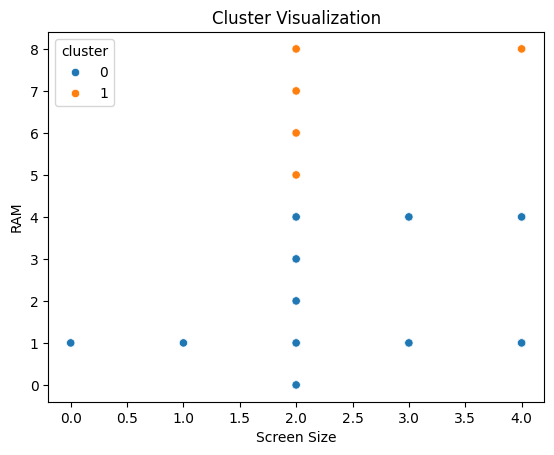

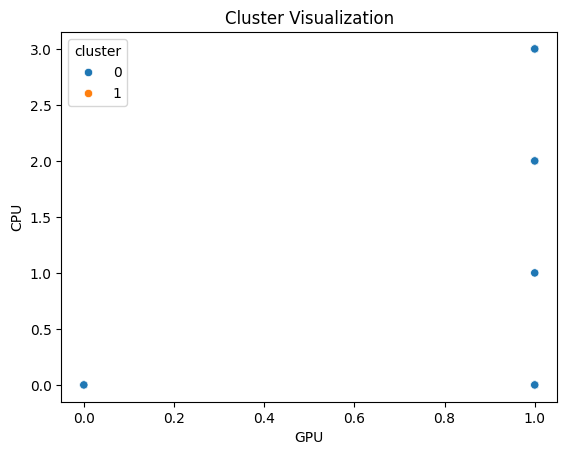

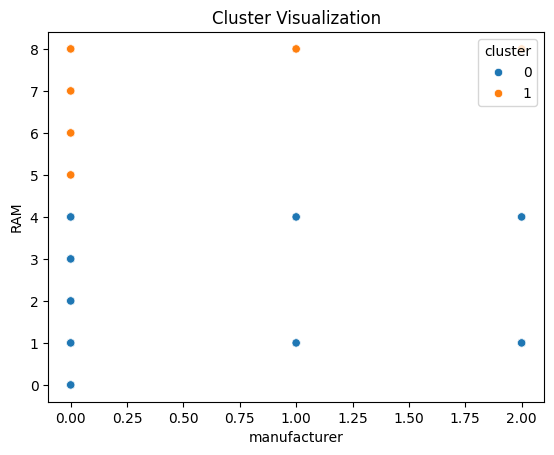

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=crawl_df, x='screen_size', y='ram', hue='cluster')
plt.xlabel('Screen Size')
plt.ylabel('RAM')
plt.title('Cluster Visualization')
plt.show()

sns.scatterplot(data=crawl_df, x='gpu', y='cpu', hue='cluster')
plt.xlabel('GPU')
plt.ylabel('CPU')
plt.title('Cluster Visualization')
plt.show()

sns.scatterplot(data=crawl_df, x='manufacturer', y='ram', hue='cluster')
plt.xlabel('manufacturer')
plt.ylabel('RAM')
plt.title('Cluster Visualization')
plt.show()


c:\Users\Parinaz\Documents\data_analysis\myvenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\Parinaz\Documents\data_analysis\myvenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\Parinaz\Documents\data_analysis\myvenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\Parinaz\Documents\data_analysis\myvenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\Parinaz\Documents\data_analysis\myvenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\Parinaz\Document

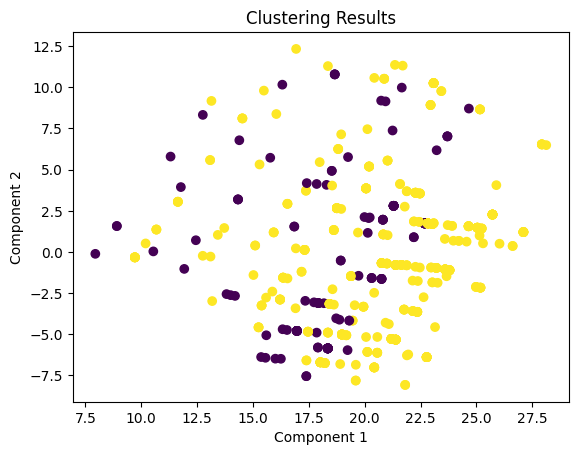

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD


combined_df = pd.concat([crawl_df, lotech_df])
columns_to_encode = [  'manufacturer', 'screen_size', 'cpu', 'ram', 'gpu']
combined_df[columns_to_encode] = combined_df[columns_to_encode].astype(str)
label_encoder = LabelEncoder()
for column in columns_to_encode:
    combined_df[column] = label_encoder.fit_transform(combined_df[column])
X_lotech = combined_df.iloc[len(crawl_df):][columns_to_encode]

lotech_labels = []

for index, row in X_lotech.iterrows():
    if row.isna().any():
        lotech_labels.append(-1)  
    else:
        encoded_row = row[columns_to_encode].values.reshape(1, -1)
        cluster_label = kmeans.predict(encoded_row)[0]
        lotech_labels.append(cluster_label)

lotech_df['cluster'] = lotech_labels
svd = TruncatedSVD(n_components=2, random_state=42)
X_lotech_svd = svd.fit_transform(X_lotech)

# Plot the clusters
plt.scatter(X_lotech_svd[:, 0], X_lotech_svd[:, 1], c=lotech_df['cluster'], cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering Results')
plt.show()

In [24]:
combined_df.drop_duplicates(inplace=True)
combined_df

,model_name,manufacturer,screen_size,cpu,ram,gpu,cluster,sale
0,پاویلیون 15-EG0361,1,20,3,13,1,1,NaN
1,Victus 16-D0019,1,21,3,1,1,0,NaN
2,Victus 16T-D000,1,21,3,1,1,0,NaN
3,Victus 15 FA1093DX,1,20,3,1,1,0,NaN
4,OMEN 16-C0002dx,1,21,0,8,0,0,NaN
...,...,...,...,...,...,...,...,...
593,Zenbook UX430UA,5,12,5,13,4,1,43551834500
594,ZenBook UX430UN,5,12,5,3,5,0,17014844500
595,Zenbook UX510UW-FI095T,5,16,5,13,5,1,21120752500
596,ZenBook UX510UX-CN211T,5,16,5,13,4,1,19016790000


In [25]:
laptop_df = combined_df 
laptop_df.dropna(subset=['sale'], inplace=True)

laptop_df.dropna(subset=['cluster'], inplace=True)
laptop_df

,model_name,manufacturer,screen_size,cpu,ram,gpu,cluster,sale
0,110-15ACL (A6-7310/4GB/500GB/W10),13,16,4,8,2,1,530322000
1,14-am079na (N3710/8GB/2TB/W10),10,12,5,13,4,1,1622803500
2,15-AC110nv (i7-6500U/6GB/1TB/Radeon,10,16,5,10,2,1,36165102000
3,15-AY023na (N3710/8GB/2TB/W10),10,16,5,13,4,1,1430312000
4,15-ay047nv (i3-6006U/6GB/1TB/Radeon,10,16,5,10,2,1,3384948000
...,...,...,...,...,...,...,...,...
593,Zenbook UX430UA,5,12,5,13,4,1,43551834500
594,ZenBook UX430UN,5,12,5,3,5,0,17014844500
595,Zenbook UX510UW-FI095T,5,16,5,13,5,1,21120752500
596,ZenBook UX510UX-CN211T,5,16,5,13,4,1,19016790000


In [26]:
import numpy as np 
import pandas as pd
laptop_df

,model_name,manufacturer,screen_size,cpu,ram,gpu,cluster,sale
0,110-15ACL (A6-7310/4GB/500GB/W10),13,16,4,8,2,1,530322000
1,14-am079na (N3710/8GB/2TB/W10),10,12,5,13,4,1,1622803500
2,15-AC110nv (i7-6500U/6GB/1TB/Radeon,10,16,5,10,2,1,36165102000
3,15-AY023na (N3710/8GB/2TB/W10),10,16,5,13,4,1,1430312000
4,15-ay047nv (i3-6006U/6GB/1TB/Radeon,10,16,5,10,2,1,3384948000
...,...,...,...,...,...,...,...,...
593,Zenbook UX430UA,5,12,5,13,4,1,43551834500
594,ZenBook UX430UN,5,12,5,3,5,0,17014844500
595,Zenbook UX510UW-FI095T,5,16,5,13,5,1,21120752500
596,ZenBook UX510UX-CN211T,5,16,5,13,4,1,19016790000


In [28]:
new_query = """ 
select manufacturers.Name , screen.size , cpu.brand , ram.capacity, gpu.brand , count(order_id) as Count
from products
join manufacturers on products.manufacturer_id = manufacturers.id
join screen on products.screen_id = screen.id
join gpu on products.GPU_id = gpu.id
join cpu on products.CPU_id = cpu.id
join ram on products.RAM_id = ram.id
join order_details on products.code = order_details.product_code
group by manufacturers.Name , screen.size , cpu.brand , ram.capacity, gpu.brand
order by count(order_id) desc
limit 10
;
"""

In [29]:
cursor.execute(new_query)
rows = cursor.fetchall()

In [30]:
#laptop_df.to_csv("request_8.csv", index=False)